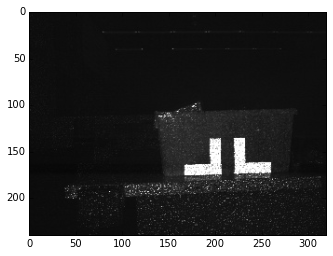

In [1]:
%matplotlib inline
import cv2
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
import pygrip


def imshow(bgr):
    rgb = np.fliplr(bgr.reshape(-1,3)).reshape(bgr.shape)
    plt.imshow(rgb)
    
def imshowgray(gray):
    plt.imshow(gray, cmap=cm.gray)
    
img = cv2.imread("ir.jpeg")
imshowgray(img)

3 channels:  (240, 320, 3)
1 channel, good!  (240, 320)


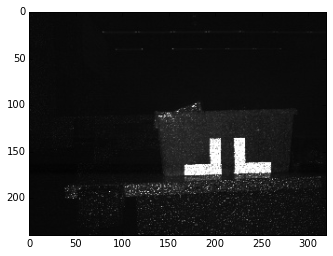

In [5]:
# above image is BGR color, need a 1 channel image
print ("3 channels: ", img.shape)
img2 = pygrip.desaturate(img)
print ("1 channel, good! ", img2.shape)
imshowgray(img2)

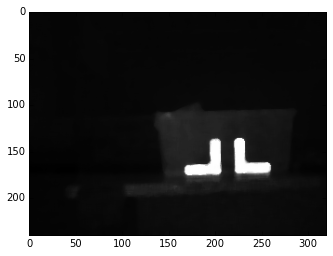

In [14]:
# need a way to filter out small bright splotches,
# or better yet, filter out anything that isn't a U shape
# median blur works ok 
img3 = pygrip.blur(img2, pygrip.MEDIAN_BLUR, 3)
imshowgray(img3)

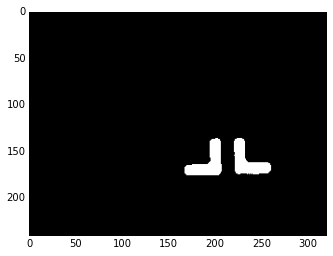

In [16]:
_, img4 = cv2.threshold(img3, 100, 255, cv2.THRESH_BINARY)
imshowgray(img4)
# behold our mask. We are interested in depth data only in the white areas.

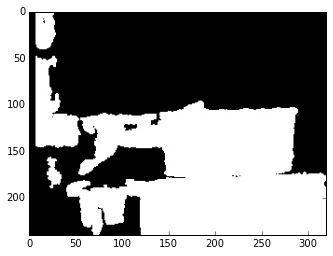

In [18]:
# a rather hastily dumped frame of depth data that mostly only shows the existence of data
depth = cv2.imread("depth.jpeg")
depth = pygrip.desaturate(depth)
imshowgray(depth)

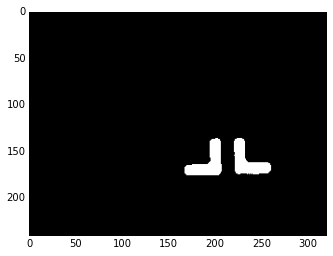

In [19]:
# the depth data we want. is there a better way to apply a mask than bitwise_and?
img5 = cv2.bitwise_and(depth, img4)
imshowgray(img5)